PLEASE DELETE ALL PRERUN "MERGED" SCRIPS BEFORE RUNNING

In [1]:
import os
import fnmatch
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd


In [2]:

def find_csv_files(base_dir, pattern):
    matches = []
    for root, dirnames, filenames in os.walk(base_dir):
        for filename in fnmatch.filter(filenames, pattern):
            matches.append(os.path.join(root, filename))
    return matches

def merge_csv_files(file_list,columns_to_rename):
    merged_df = pd.DataFrame()
    for file in file_list:
        df = pd.read_csv(file)
        df.columns=columns_to_rename
        merged_df = pd.concat([merged_df, df], ignore_index=True)
    return merged_df


Merged 5 files into 'merged_jenkspy_hazard.csv'
Merged 5 files into 'merged_kmeans_hazard.csv'
Merged 5 files into 'merged_percentile_hazard.csv'


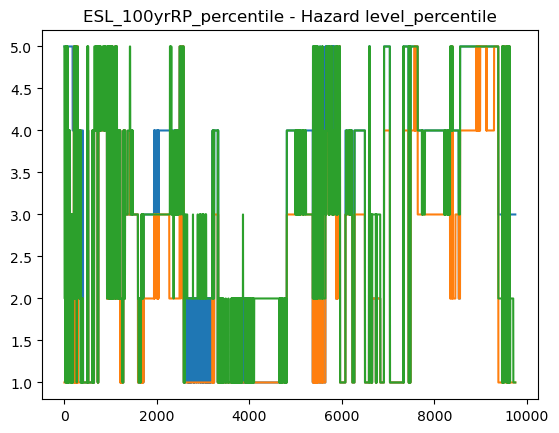

In [3]:
#Hazard dataset

for classif in ["jenkspy","kmeans","percentile"]:

    columns_to_rename = ['transect_id', 'country_id', 'continent', 'country_name',
                        'ESL_100yrRP_Jenkspy', 'EWH_100yrRP_Jenkspy',
                        'Land_Subsidence_2010_Jenkspy',
                        'Shoreline_Change_Rate_PC_Jenkspy',
                        'Cat3_Hurricane_Return_Period_PC_Jenkspy', 'geometry',
                        'ESL_100yrRP_Jenkspy - Hazard level_Jenkspy',
                        'EWH_100yrRP_Jenkspy - Hazard level_Jenkspy',
                        'Land_Subsidence_2010_Jenkspy - Hazard level',
                        'Shoreline_Change_Rate_PC_Jenkspy - Hazard level_Jenkspy',
                        'Cat3_Hurricane_Return_Period_PC_Jenkspy - Hazard level_Jenkspy']

    saved_file_name="merged_jenkspy_hazard.csv"

    columns_to_rename=[col.replace('Jenkspy', classif) for col in columns_to_rename]
    saved_file_name=saved_file_name.replace('jenkspy', classif) 

    # Base directory to start searching
    base_directory = r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data_CVI_components\Caribbean Thesis_Results\Validation\Hazard"

    # Pattern to match CSV files containing '_jenkspy'
    csv_pattern = f"*{classif}*.csv"

    # Find all matching CSV files
    csv_files = find_csv_files(base_directory, csv_pattern)

    # Merge all found CSV files
    merged_dataframe = merge_csv_files(csv_files,columns_to_rename)
    merged_dataframe=merged_dataframe.sort_values(by="transect_id")
    merged_dataframe.index=range(0,len(merged_dataframe.index))

    # Save the merged dataframe to a new CSV file
    merged_dataframe.to_csv(os.path.join(base_directory,saved_file_name), index=False)

    print(f"Merged {len(csv_files)} files into '{saved_file_name}'")

    plt.plot(merged_dataframe.index,merged_dataframe[columns_to_rename[-5]])
    plt.title(columns_to_rename[-5])
    # plt.show()

Haz_check=merged_dataframe.copy()


*jenkspy*.csv
Merged 5 files into 'merged_jenkspy_exposure.csv'
*kmeans*.csv
Merged 5 files into 'merged_kmeans_exposure.csv'
*percentile*.csv
Merged 5 files into 'merged_percentile_exposure.csv'


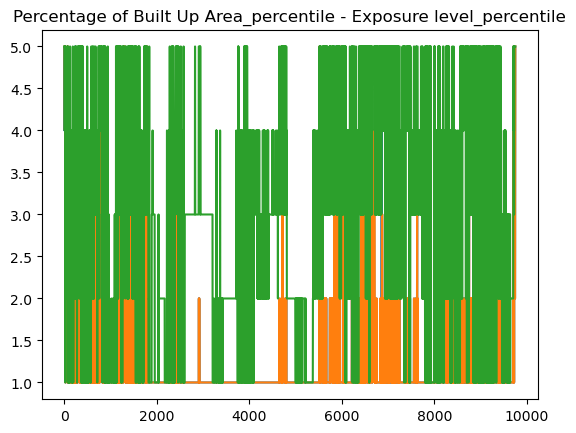

In [4]:
#Exposure dataset

for classif in ["jenkspy","kmeans","percentile"]:

    columns_to_rename = ['transect_id', 'country_id', 'continent', 'country_name',
                        'Percentage of Built Up Area_Jenkspy',
                        'LECZ Area÷LECZ mean elevation_Jenkspy',
                        'Neashore Slope (tanβ or m^-1)_Jenkspy',
                        'Population Within 1km of the coastline_Jenkspy',
                        'Sediment Type_Jenkspy', 'geometry',
                        'Percentage of Built Up Area_Jenkspy - Exposure level_Jenkspy',
                        'LECZ Area÷LECZ mean elevation_Jenkspy - Exposure level_Jenkspy',
                        'Neashore Slope (tanβ or m^-1)_Jenkspy - Exposure level_Jenkspy',
                        'Population Within 1km of the coastline_Jenkspy - Exposure level_Jenkspy',
                        'Sediment Type_Jenkspy - Exposure level_Jenkspy']

    saved_file_name="merged_jenkspy_exposure.csv"

    columns_to_rename=[col.replace('Jenkspy', classif) for col in columns_to_rename]
    saved_file_name=saved_file_name.replace('jenkspy', classif) 

    # Base directory to start searching
    base_directory = r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data_CVI_components\Caribbean Thesis_Results\Validation\Exposure"

    # Pattern to match CSV files containing '_jenkspy'
    csv_pattern = f"*{classif}*.csv"
    print(csv_pattern)

    # Find all matching CSV files
    csv_files = find_csv_files(base_directory, csv_pattern)

    # Merge all found CSV files
    merged_dataframe = merge_csv_files(csv_files,columns_to_rename)
    merged_dataframe=merged_dataframe.sort_values(by="transect_id")
    merged_dataframe.index=range(0,len(merged_dataframe.index))

    # Save the merged dataframe to a new CSV file
    merged_dataframe.to_csv(os.path.join(base_directory,saved_file_name), index=False)

    print(f"Merged {len(csv_files)} files into '{saved_file_name}'")

    plt.plot(merged_dataframe.index,merged_dataframe[columns_to_rename[-5]])
    plt.title(columns_to_rename[-5])

Exp_check=merged_dataframe.copy()
    # plt.show()


Saved as 'merged_jenkspy_vulnerability.csv'
Saved as 'merged_kmeans_vulnerability.csv'
Saved as 'merged_percentile_vulnerability.csv'


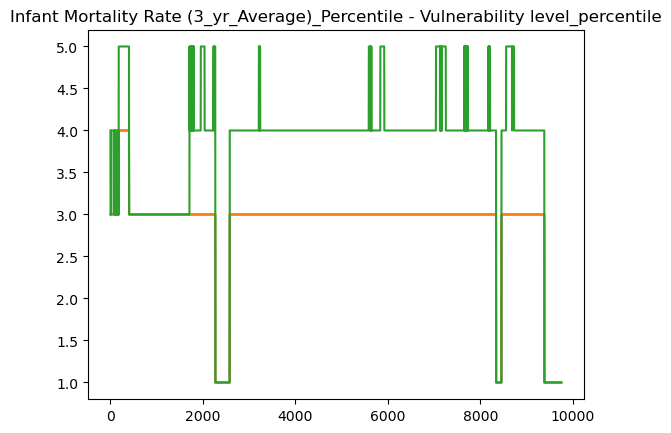

In [5]:
# vulnerability dataset

for classif in ["jenkspy","kmeans","percentile"]:

    vuln_loc=r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data_CVI_components\Caribbean Thesis_Results\Vulnerability"
    save_direc=r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data_CVI_components\Caribbean Thesis_Results\Validation\Vuln_Filtered"

    saved_file_name="merged_jenkspy_vulnerability.csv".replace('jenkspy', classif) 



    csv_pattern = f"*{classif}*.csv"
    csv_files = find_csv_files(vuln_loc, csv_pattern)

    countries=["Jamaica","Turks and Caicos Islands","Barbados","The Bahamas","Saint Lucia"]

    df_feedback_countries_list=[]
    for country in countries:
        # Pattern to match CSV files containing '_jenkspy'
        
        df_main_vuln=pd.read_csv(csv_files[0])
        
        # Find all matching CSV files 
        df_single_country=df_main_vuln.loc[df_main_vuln["country_name"]==country,:]
        df_feedback_countries_list.append(df_single_country)
    df_feedback_countries = pd.concat(df_feedback_countries_list, ignore_index=True)
    df_feedback_countries=df_feedback_countries.sort_values(by="transect_id")
    df_feedback_countries.index=range(0,len(df_feedback_countries.index))

        # Save the merged dataframe to a new CSV file
    df_feedback_countries.to_csv(os.path.join(save_direc,saved_file_name), index=False)

    print(f"Saved as '{saved_file_name}'")

    plt.plot(df_feedback_countries.index,df_feedback_countries.iloc[:,-5])
    plt.title(df_feedback_countries.iloc[:,-5].name)
    # plt.show()

Vuln_check=df_feedback_countries.copy()
        


In [6]:
#Check if all transects are alighned
print((Haz_check["transect_id"]==Exp_check["transect_id"]).unique())
print((Exp_check["transect_id"]==Vuln_check["transect_id"]).unique())

[ True]
[ True]


In [7]:
#Exposure dataset

for classif in ["merged_jenkspy","merged_kmeans","merged_percentile"]:

    saved_file_name="merged_jenkspy_risk_class.csv".replace('merged_jenkspy', classif) 

    # Base directory to start searching
    base_directory = r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data_CVI_components\Caribbean Thesis_Results\Validation"

    # Pattern to match CSV files containing '_jenkspy'
    csv_pattern = f"*{classif}*.csv"
    print(csv_pattern)

    # Find all matching CSV files
    csv_files = find_csv_files(base_directory, csv_pattern)
    

    for i,file_path in enumerate(csv_files):
        
        if i==0:
            dfs=pd.read_csv(file_path).iloc[:,0:4]
            df = pd.read_csv(file_path).iloc[:,9:]
            dfs=pd.concat([dfs,df],axis=1)
        
        if i>0:
            df = pd.read_csv(file_path).iloc[:,10:]
            dfs=pd.concat([dfs,df],axis=1)






    # Identify the correct geometry column (replace 'geometry_column_name' with the actual column name)
    geometry_column_name = 'geometry'

    circle_center_df=dfs.copy()

    circle_center_df['x'] = circle_center_df[geometry_column_name].apply(lambda point_str: float(point_str.strip('POINT ()').split()[0]))
    circle_center_df['y'] = circle_center_df[geometry_column_name].apply(lambda point_str: float(point_str.strip('POINT ()').split()[1]))

    circle_center_df = circle_center_df.drop(columns=[geometry_column_name])

    # Create the GeoDataFrame with the correct geometry column
    circle_center = gpd.GeoDataFrame(circle_center_df, geometry=gpd.points_from_xy(circle_center_df.x, circle_center_df.y))



    # Slice the DataFrame to exclude 'geometry', 'x', and 'y' columns
    other_columns = circle_center.iloc[:, 0:-3]

    # Concatenate the 'geometry' column with the other columns
    circle_center2 = gpd.GeoDataFrame(geometry=circle_center.geometry, data=other_columns)


    circle_center=circle_center2
    circle_center


    #Extract 25 nearest points from expert feedback


    groundTruth=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data_CVI_components\Caribbean Thesis_Results\Validation\Expert_Feedback_collated.csv",sep=";")
    groundTruth=groundTruth.iloc[:,:-5]
    groundTruth["lon"]=groundTruth["lon"].apply(lambda x: float(str(x).replace(',', '.')))
    groundTruth["lat"]=groundTruth["lat"].apply(lambda x: float(str(x).replace(',', '.')))
    groundTruth




    Hazard_map=groundTruth
    Hazard_map = gpd.GeoDataFrame(
        Hazard_map, geometry=gpd.points_from_xy(Hazard_map.lon, Hazard_map.lat), crs="EPSG:4326"
    )

    groundTruth=Hazard_map
    groundTruth

    from shapely.ops import nearest_points

    # Assuming gdf1 and gdf2 are your GeoDataFrames

    gdf1=groundTruth
    gdf2=circle_center

    # Ensure both GeoDataFrames have a spatial index
    gdf1.sindex
    gdf2.sindex

    # Iterate through each geometry in gdf1
    nearest_points_list = []

    for idx, row in gdf1.iterrows():
        # Get the geometry from gdf1
        geom1 = row.geometry
        
        # Find the nearest point in gdf2
        nearest_point = nearest_points(geom1, gdf2.unary_union)[1]
        
        # Append the nearest point to the list
        nearest_points_list.append(nearest_point)

    # Create a GeoDataFrame from the nearest points list
    nearest_points_gdf = gpd.GeoDataFrame(geometry=nearest_points_list, crs=gdf1.crs)

    # Optionally, you can also join additional attributes from gdf1
    # to the nearest_points_gdf if needed.

    # Now, nearest_points_gdf contains the nearest points from gdf2
    # to each geometry in gdf1.
    nearest_points_gdf

    #time to save
    finally2=pd.merge(left=nearest_points_gdf,right=circle_center,left_on="geometry",right_on="geometry")
    finally2

    finally2.to_csv(os.path.join(base_directory,saved_file_name), index=False)

*merged_jenkspy*.csv
*merged_kmeans*.csv
*merged_percentile*.csv
